# Ejemplo de animacion - Bilbioteca EVQueues

## Animacion usando `Plots`y los comandos `stateplot` y `reversedstateplot` de la biblioteca

In [1]:
#using Pkg;Pkg.instantiate()
using EVQueues, Plots, ProgressMeter

In [2]:
lambda=120.0;
mu=1.0;
gamma=0.5;
C=80.0;

Tfinal=100.0;
snaps = collect(0.1:.5:100.0);

In [3]:
sim = ev_edf(lambda,mu,gamma,Tfinal,C,snapshots=snaps);

Simulando... 100%|██████████████████████████████████████| Time: 0:00:01


┌ Info: Saved animation to 
│   fn = /tmp/anim.gif
└ @ Plots /home/andres/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/tmp/anim.gif")
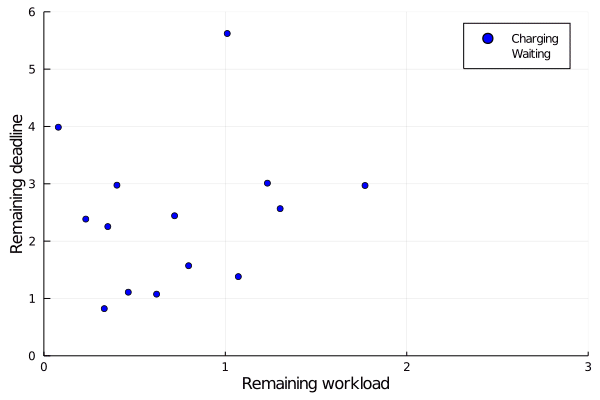

In [5]:
prog=Progress(length(snaps), dt=1, desc="Creando animacion... ");

anim = @animate for snapshot in sim.snapshots
    stateplot(snapshot.charging , xlims=(0,3/mu), ylims=(0,3/gamma))
end

gif(anim, "/tmp/anim.gif", fps = 10)

In [6]:
sim2 = ev_lifo(lambda,mu,gamma,Tfinal,C,snapshots=snaps);

┌ Info: Saved animation to 
│   fn = /tmp/anim2.gif
└ @ Plots /home/andres/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/tmp/anim2.gif")
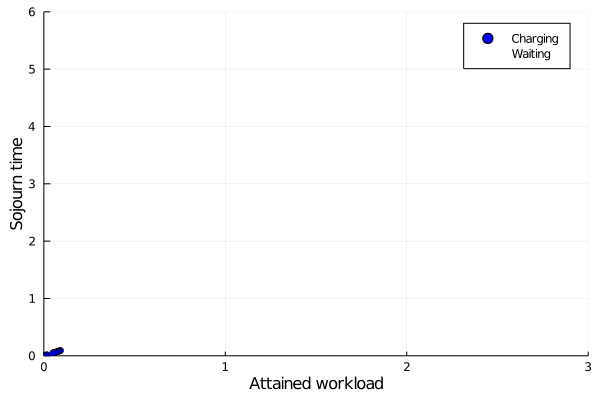

In [9]:
prog=Progress(length(snaps), dt=1, desc="Creando animacion... ");

anim = @animate for snapshot in sim2.snapshots
    reversedstateplot(snapshot.charging , xlims=(0,3/mu), ylims=(0,3/gamma))
end

gif(anim, "/tmp/anim2.gif", fps = 10)